## Epoch in Machine Learning
Each time a dataset passes through an algorithm, it is said to have completed an epoch. Therefore, Epoch, in machine learning, refers to the one entire passing of training data through the algorithm. It's a hyperparameter that determines the process of training the machine learning model. 

## What is gradient descent?
Gradient descent is an optimization algorithm which is commonly-used to train machine learning models and neural networks.  Training data helps these models learn over time, and the cost function within gradient descent specifically acts as a barometer, gauging its accuracy with each iteration of parameter updates. Until the function is close to or equal to zero, the model will continue to adjust its parameters to yield the smallest possible error. Once machine learning models are optimized for accuracy, they can be powerful tools for artificial intelligence (AI) and computer science applications.<br>
The goal of gradient descent is to minimize the cost function, or the error between predicted and actual y.

## Learning Rate 
Learning rate (also referred to as step size or the alpha) is the size of the steps that are taken to reach the minimum. This is typically a small value, and it is evaluated and updated based on the behavior of the cost function. High learning rates result in larger steps but risks overshooting the minimum. Conversely, a low learning rate has small step sizes. While it has the advantage of more precision, the number of iterations compromises overall efficiency as this takes more time and computations to reach the minimum.

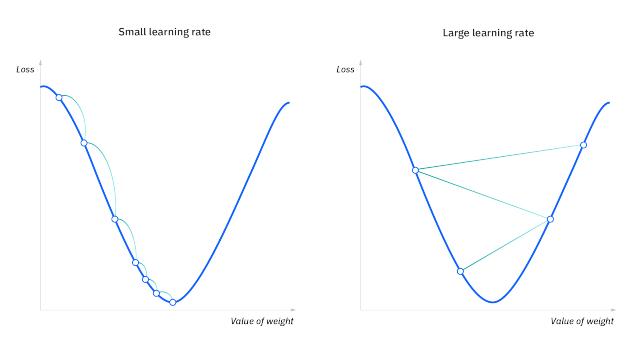

## Types of gradient descent
### 1. Batch gradient descent 
Batch gradient descent sums the error for each point in a training set, updating the model only after all training examples have been evaluated. This process referred to as a training epoch.<br>
While this batching provides computation efficiency, it can still have a long processing time for large training datasets as it still needs to store all of the data into memory. Batch gradient descent also usually produces a stable error gradient and convergence, but sometimes that convergence point isn’t the most ideal, finding the local minimum versus the global one.
### 2. Stochastic gradient descent
Stochastic gradient descent (SGD) runs a training epoch for each example within the dataset and it updates each training example's parameters one at a time. Since you only need to hold one training example, they are easier to store in memory. While these frequent updates can offer more detail and speed, it can result in losses in computational efficiency when compared to batch gradient descent. Its frequent updates can result in noisy gradients, but this can also be helpful in escaping the local minimum and finding the global one.
### 3. Mini-batch gradient descent 
Mini-batch gradient descent combines concepts from both batch gradient descent and stochastic gradient descent. It splits the training dataset into small batch sizes and performs updates on each of those batches. This approach strikes a balance between the computational efficiency of batch gradient descent and the speed of stochastic gradient descent.

## Code for cost function

In [1]:
import numpy as np

In [2]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

## Code for activation function

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### since sigmoid gives continuous value we need to set a thresold above thresold its 1 and below thresold its 0

In [4]:
def categorical_output(prediction):
    return [1 if i>0.5 else 0 for i in prediciton]

## Code for gradient descent 

In [14]:
def gradient_descent(x1, x2, y_true, alpha = 0.5, epochs = 1000):
    
    bias = 0
    w1 = w2 = 1
    
    for i in range(epochs):
        y_hat = w1*x1 + w2*x2 + bias
        # uncomment the line below if you use activation function on output layer. 
        y_hat = sigmoid(y_hat) # don't forget to define activation function
        error = log_loss(y_true,y_hat)

        n = len(x1)
        df_dw1 = (1/n)*np.dot(np.transpose(x1),(y_hat-y_true))
        df_dw2 = (1/n)*np.dot(np.transpose(x2),(y_hat-y_true))
        df_db = np.mean((y_hat-y_true))

        w1 = w1 - (alpha * df_dw1)
        w2 = w2 - (alpha * df_dw2)
        bias = bias - (alpha * df_db)
        
        print('W1:',w1,'W2:',w2,'b',bias,'Loss:',error)
    cofficients = (w1,w2,bias)
    return cofficients

## Code for prediction function

In [6]:
def prediction_fun(cofficients,x1,x2):
    w1,w2,bias = cofficients
    prediction = (w1*x1) + (w2*x2) + bias
    return prediction

## Implementing our code with simple dataset 

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('insurance_data.csv')
df.head(5)

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [9]:
# scaling x1 between [0,1] because x2 is ranging [0,1]
df['age'] = df['age']/100

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

In [11]:
X_train.head(2)

,age,affordibility
0,0.22,1
13,0.29,0


In [12]:
len(X_train),len(X_test),len(y_train),len(y_test)

(22, 6, 22, 6)

In [36]:
cofficients = gradient_descent(X_train['age'], X_train['affordibility'], y_true= y_train, alpha=0.5, epochs=7000)

W1: 0.974907633470177 W2: 0.948348125394529 b -0.11341867736368583 Loss: 0.7113403233723417
W1: 0.9556229728273669 W2: 0.9058873696677865 b -0.2122349122718517 Loss: 0.681264778737757
W1: 0.9416488476693794 W2: 0.8719790823960313 b -0.2977578997796538 Loss: 0.6591474252715025
W1: 0.9323916996249162 W2: 0.8457541517722915 b -0.3715094724003511 Loss: 0.6431523291301917
W1: 0.9272267472726993 W2: 0.8262362885332687 b -0.43506643026891584 Loss: 0.6316873063379158
W1: 0.9255469396815343 W2: 0.8124402814952774 b -0.48994490058938817 Loss: 0.623471707997592
W1: 0.9267936114129968 W2: 0.8034375029757677 b -0.5375299543522853 Loss: 0.6175321183044205
W1: 0.93047170420295 W2: 0.7983920007454487 b -0.5790424270894963 Loss: 0.6131591858705934
W1: 0.9361540784567942 W2: 0.7965748796787705 b -0.6155315088627655 Loss: 0.6098518179750948
W1: 0.9434791243557357 W2: 0.7973647616854131 b -0.6478828179413606 Loss: 0.6072639970231438
W1: 0.9521448361628082 W2: 0.8002404280558159 b -0.6768343869109611 Loss:

W1: 5.283687817907154 W2: 1.4650715406883765 b -3.0616664861630394 Loss: 0.4584715369753113
W1: 5.291491078096924 W2: 1.4653530832819395 b -3.065096461126359 Loss: 0.4583256745493111
W1: 5.29928010916186 W2: 1.465634800932903 b -3.0685207436340973 Loss: 0.45818033534378916
W1: 5.307054945125187 W2: 1.4659166939618118 b -3.0719393480604706 Loss: 0.45803551715620744
W1: 5.314815619925096 W2: 1.4661987626399762 b -3.0753522887044826 Loss: 0.45789121779456465
W1: 5.3225621674147305 W2: 1.4664810071905663 b -3.0787595797907787 Loss: 0.4577474350773423
W1: 5.330294621362164 W2: 1.4667634277896855 b -3.0821612354704873 Loss: 0.45760416683345007
W1: 5.338013015450391 W2: 1.4670460245674237 b -3.085557269822047 Loss: 0.45746141090217146
W1: 5.345717383277323 W2: 1.4673287976088918 b -3.08894769685202 Loss: 0.4573191651331106
W1: 5.353407758355784 W2: 1.4676117469552366 b -3.0923325304958955 Loss: 0.4571774273861379
W1: 5.361084174113516 W2: 1.4678948726046375 b -3.095711784618876 Loss: 0.457036

W1: 6.942112436635479 W2: 1.5429667981408421 b -3.805726228544757 Loss: 0.43301974638024715
W1: 6.947096624500681 W2: 1.5432591951026964 b -3.8080122698942747 Loss: 0.4329592995755856
W1: 6.9520730066217435 W2: 1.5435514880865597 b -3.810295041626215 Loss: 0.43289903877030206
W1: 6.95704159937322 W2: 1.5438436763524825 b -3.8125745498349053 Loss: 0.4328389632956426
W1: 6.962002419085274 W2: 1.5441357591649523 b -3.8148508005998147 Loss: 0.43277907248564274
W1: 6.966955482043824 W2: 1.5444277357928793 b -3.817123799985601 Loss: 0.43271936567711383
W1: 6.971900804490683 W2: 1.5447196055095807 b -3.819393554042158 Loss: 0.43265984220962994
W1: 6.976838402623697 W2: 1.545011367592766 b -3.821660068804667 Loss: 0.4326005014255148
W1: 6.981768292596888 W2: 1.545303021324521 b -3.82392335029364 Loss: 0.43254134266982885
W1: 6.9866904905205915 W2: 1.5455945659912929 b -3.8261834045149703 Loss: 0.4324823652903563
W1: 6.991605012461594 W2: 1.545886000883875 b -3.828440237459978 Loss: 0.432423568

W1: 7.622622798381005 W2: 1.5861484935665058 b -4.120740380015794 Loss: 0.42559635041976945
W1: 7.626579951095482 W2: 1.5864186297221994 b -4.12258926415914 Loss: 0.4255579673097776
W1: 7.630531360608445 W2: 1.5866885911344828 b -4.124435662266599 Loss: 0.4255196938746733
W1: 7.634477037902623 W2: 1.5869583775635119 b -4.126279578610944 Loss: 0.42548152975204195
W1: 7.638416993933304 W2: 1.5872279887716434 b -4.128121017455482 Loss: 0.42544347458085563
W1: 7.6423512396284154 W2: 1.5874974245234246 b -4.12995998305407 Loss: 0.42540552800146736
W1: 7.646279785888609 W2: 1.5877666845855811 b -4.131796479651148 Loss: 0.4253676896556039
W1: 7.650202643587346 W2: 1.5880357687270061 b -4.13363051148176 Loss: 0.42532995918636113
W1: 7.654119823570977 W2: 1.5883046767187488 b -4.135462082771585 Loss: 0.4252923362381976
W1: 7.658031336658827 W2: 1.5885734083340024 b -4.137291197736955 Loss: 0.4252548204569283
W1: 7.661937193643278 W2: 1.5888419633480944 b -4.139117860584889 Loss: 0.4252174114897

W1: 8.9590840560252 W2: 1.6894435795059521 b -4.756374729796051 Loss: 0.4155729323983865
W1: 8.961251664373764 W2: 1.6896301760405825 b -4.757423794241653 Loss: 0.41556124333335537
W1: 8.963416612413829 W2: 1.6898166030697588 b -4.758471629143067 Loss: 0.41554958266083103
W1: 8.96557890418149 W2: 1.690002860710728 b -4.75951823623623 Loss: 0.415537950303902
W1: 8.967738543704975 W2: 1.690188949080847 b -4.760563617253987 Loss: 0.41552634618589257
W1: 8.96989553500467 W2: 1.690374868297581 b -4.761607773926101 Loss: 0.4155147702303621
W1: 8.972049882093133 W2: 1.690560618478502 b -4.762650707979256 Loss: 0.4155032223611041
W1: 8.974201588975118 W2: 1.6907461997412887 b -4.76369242113707 Loss: 0.41549170250214557
W1: 8.97635065964759 W2: 1.6909316122037246 b -4.764732915120092 Loss: 0.41548021057774615
W1: 8.978497098099746 W2: 1.691116855983697 b -4.765772191645819 Loss: 0.41546874651239707
W1: 8.980640908313035 W2: 1.6913019311991964 b -4.766810252428698 Loss: 0.4154573102308207
W1: 8.

W1: 9.586901033132694 W2: 1.745932975409353 b -5.06263028453141 Loss: 0.4127616796671856
W1: 9.588330087094727 W2: 1.7460670394016584 b -5.063332857743212 Loss: 0.4127565635346244
W1: 9.58975753230781 W2: 1.7462009767794588 b -5.064034664574883 Loss: 0.4127514588341217
W1: 9.591183370907146 W2: 1.746334787657134 b -5.064735705991476 Loss: 0.41274636553791044
W1: 9.592607605024405 W2: 1.7464684721489947 b -5.065435982956564 Loss: 0.41274128361829826
W1: 9.594030236787741 W2: 1.7466020303692826 b -5.0661354964322385 Loss: 0.4127362130476676
W1: 9.595451268321797 W2: 1.7467354624321703 b -5.066834247379113 Loss: 0.4127311537984744
W1: 9.59687070174771 W2: 1.7468687684517612 b -5.0675322367563265 Loss: 0.41272610584324904
W1: 9.598288539183116 W2: 1.7470019485420891 b -5.068229465521546 Loss: 0.41272106915459567
W1: 9.599704782742167 W2: 1.7471350028171186 b -5.068925934630969 Loss: 0.41271604370519194
W1: 9.601119434535526 W2: 1.7472679313907442 b -5.0696216450393266 Loss: 0.4127110294677

W1: 10.142409631011114 W2: 1.799842358879072 b -5.337570342050735 Loss: 0.4111916411655802
W1: 10.143237496661618 W2: 1.7999253240445068 b -5.33798279076745 Loss: 0.4111899137676722
W1: 10.144064502071707 W2: 1.8000082106088715 b -5.338394818855327 Loss: 0.4111881899424663
W1: 10.144890648239883 W2: 1.8000910186476422 b -5.338806426786565 Loss: 0.4111864696821545
W1: 10.145715936163281 W2: 1.8001737482362241 b -5.33921761503275 Loss: 0.4111847529789463
W1: 10.146540366837664 W2: 1.8002563994499519 b -5.33962838406485 Loss: 0.4111830398250703
W1: 10.147363941257431 W2: 1.8003389723640895 b -5.3400387343532225 Loss: 0.41118133021277326
W1: 10.14818666041562 W2: 1.80042146705383 b -5.340448666367609 Loss: 0.41117962413431947
W1: 10.149008525303902 W2: 1.8005038835942968 b -5.340858180577142 Loss: 0.4111779215819924
W1: 10.149829536912595 W2: 1.800586222060542 b -5.341267277450339 Loss: 0.4111762225480927
W1: 10.150649696230657 W2: 1.8006684825275476 b -5.341675957455113 Loss: 0.4111745270

W1: 10.4457975883589 W2: 1.8307495710791302 b -5.489249436071801 Loss: 0.41067632664033216
W1: 10.446317162276689 W2: 1.8308033541759283 b -5.4895101000618585 Loss: 0.410675644035439
W1: 10.446836220096522 W2: 1.830857086713939 b -5.489770508186715 Loss: 0.41067496278222165
W1: 10.447354762371237 W2: 1.8309107687416206 b -5.490030660714482 Loss: 0.4106742828779024
W1: 10.447872789653001 W2: 1.8309644003073842 b -5.49029055791296 Loss: 0.4106736043197086
W1: 10.448390302493312 W2: 1.8310179814595933 b -5.490550200049634 Loss: 0.41067292710487463
W1: 10.448907301442997 W2: 1.8310715122465642 b -5.490809587391676 Loss: 0.4106722512306401
W1: 10.449423787052217 W2: 1.831124992716566 b -5.4910687202059485 Loss: 0.4106715766942509
W1: 10.449939759870466 W2: 1.8311784229178207 b -5.491327598758998 Loss: 0.41067090349295854
W1: 10.450455220446571 W2: 1.8312318028985028 b -5.491586223317063 Loss: 0.41067023162402144
W1: 10.450970169328697 W2: 1.83128513270674 b -5.49184459414607 Loss: 0.4106695

W1: 10.554397444570329 W2: 1.8420531693925093 b -5.543798978382728 Loss: 0.4105482489268102
W1: 10.554810017491945 W2: 1.8420963481950683 b -5.544006466348145 Loss: 0.4105478180325294
W1: 10.555222187246637 W2: 1.84213948657796 b -5.544213753463438 Loss: 0.4105473879781256
W1: 10.55563395425348 W2: 1.8421825845797222 b -5.544420839933704 Loss: 0.4105469587619114
W1: 10.556045318931067 W2: 1.842225642238855 b -5.544627725963807 Loss: 0.4105465303822029
W1: 10.556456281697509 W2: 1.842268659593821 b -5.5448344117583845 Loss: 0.41054610283731957
W1: 10.55686684297043 W2: 1.842311636683045 b -5.545040897521845 Loss: 0.4105456761255844
W1: 10.557277003166977 W2: 1.8423545735449143 b -5.545247183458366 Loss: 0.41054525024532396
W1: 10.557686762703812 W2: 1.8423974702177788 b -5.5454532697718975 Loss: 0.41054482519486873
W1: 10.558096121997117 W2: 1.8424403267399507 b -5.5456591566661615 Loss: 0.4105444009725519
W1: 10.558505081462597 W2: 1.8424831431497048 b -5.545864844344652 Loss: 0.410543

W1: 10.68699521347614 W2: 1.85602134212655 b -5.6105819609711265 Loss: 0.4104312333434572
W1: 10.687279500763106 W2: 1.8560514839604745 b -5.610725352716259 Loss: 0.41043102847166096
W1: 10.68756351577513 W2: 1.8560815977501035 b -5.610868608022799 Loss: 0.4104308239915071
W1: 10.687847258784759 W2: 1.8561116835219267 b -5.611011727025622 Loss: 0.4104306199022299
W1: 10.68813073006424 W2: 1.856141741302408 b -5.611154709859461 Loss: 0.41043041620306636
W1: 10.688413929885527 W2: 1.8561717711179857 b -5.611297556658904 Loss: 0.4104302128932542
W1: 10.688696858520284 W2: 1.8562017729950726 b -5.6114402675584 Loss: 0.4104300099720334
W1: 10.688979516239876 W2: 1.856231746960056 b -5.611582842692254 Loss: 0.4104298074386447
W1: 10.689261903315375 W2: 1.8562616930392977 b -5.611725282194628 Loss: 0.410429605292331
W1: 10.68954402001756 W2: 1.8562916112591337 b -5.611867586199544 Loss: 0.4104294035323363
W1: 10.689825866616921 W2: 1.856321501645875 b -5.612009754840881 Loss: 0.41042920215790

W1: 10.801549829647177 W2: 1.868233480964351 b -5.668434444222079 Loss: 0.4103644494219548
W1: 10.801725354276845 W2: 1.8682522942544393 b -5.668523198556561 Loss: 0.4103643712313607
W1: 10.801900713715089 W2: 1.8682710901465316 b -5.668611869698666 Loss: 0.4103642931877321
W1: 10.802075908121813 W2: 1.868289868656889 b -5.668700457728295 Loss: 0.4103642152907892
W1: 10.802250937656762 W2: 1.8683086298017566 b -5.668788962725266 Loss: 0.4103641375402528
W1: 10.802425802479519 W2: 1.8683273735973647 b -5.668877384769319 Loss: 0.41036405993584335
W1: 10.802600502749499 W2: 1.8683461000599273 b -5.668965723940113 Loss: 0.41036398247728273
W1: 10.80277503862596 W2: 1.8683648092056437 b -5.669053980317229 Loss: 0.41036390516429305
W1: 10.802949410267994 W2: 1.8683835010506977 b -5.6691421539801645 Loss: 0.41036382799659693
W1: 10.803123617834531 W2: 1.8684021756112572 b -5.66923024500834 Loss: 0.4103637509739176
W1: 10.803297661484342 W2: 1.8684208329034753 b -5.6693182534810935 Loss: 0.410

W1: 10.83458276261917 W2: 1.871779473909493 b -5.6851435412257985 Loss: 0.4103510267925899
W1: 10.83472727721972 W2: 1.8717950110321169 b -5.685216667454494 Loss: 0.41035097377155405
W1: 10.834871656500864 W2: 1.8718105338135724 b -5.685289725437468 Loss: 0.4103509208496885
W1: 10.83501590059231 W2: 1.8718260422672175 b -5.685362715239714 Loss: 0.410350868026806
W1: 10.835160009623639 W2: 1.8718415364063967 b -5.685435636926158 Loss: 0.4103508153027187
W1: 10.835303983724302 W2: 1.8718570162444428 b -5.685508490561665 Loss: 0.4103507626772403
W1: 10.835447823023618 W2: 1.871872481794675 b -5.685581276211033 Loss: 0.41035071015018415
W1: 10.835591527650777 W2: 1.8718879330704008 b -5.685653993938997 Loss: 0.41035065772136375
W1: 10.835735097734842 W2: 1.8719033700849144 b -5.68572664381023 Loss: 0.41035060539059354
W1: 10.835878533404744 W2: 1.8719187928514975 b -5.685799225889338 Loss: 0.41035055315768804
W1: 10.836021834789285 W2: 1.87193420138342 b -5.685871740240865 Loss: 0.41035050

W1: 10.859507927767046 W2: 1.8744623060975618 b -5.697759360065001 Loss: 0.41034261453790677
W1: 10.859629147538925 W2: 1.8744753686937516 b -5.697820731732039 Loss: 0.41034257722304646
W1: 10.859750254237973 W2: 1.87448841925048 b -5.697882046311808 Loss: 0.4103425399777221
W1: 10.85987124797177 W2: 1.8745014577789303 b -5.697943303858326 Loss: 0.41034250280180246
W1: 10.859992128847786 W2: 1.874514484290275 b -5.6980045044255565 Loss: 0.41034246569515676
W1: 10.86011289697339 W2: 1.8745274987956764 b -5.698065648067411 Loss: 0.4103424286576553
W1: 10.860233552455846 W2: 1.8745405013062861 b -5.698126734837748 Loss: 0.41034239168916753
W1: 10.860354095402304 W2: 1.8745534918332452 b -5.698187764790374 Loss: 0.41034235478956377
W1: 10.860474525919816 W2: 1.8745664703876839 b -5.698248737979042 Loss: 0.4103423179587146
W1: 10.860594844115324 W2: 1.8745794369807227 b -5.698309654457453 Loss: 0.41034228119649024
W1: 10.860715050095667 W2: 1.874592391623471 b -5.6983705142792545 Loss: 0.41

W1: 10.90304918796001 W2: 1.879163625741288 b -5.719813890319355 Loss: 0.41033144422367945
W1: 10.90312992826537 W2: 1.8791723609212843 b -5.719854806029474 Loss: 0.41033142766188374
W1: 10.903210593760052 W2: 1.879181088071522 b -5.719895683899294 Loss: 0.41033141113075117
W1: 10.903291184514302 W2: 1.8791898071994226 b -5.719936523964216 Loss: 0.4103313946302248
W1: 10.903371700598298 W2: 1.8791985183124005 b -5.719977326259607 Loss: 0.41033137816024734
W1: 10.903452142082152 W2: 1.879207221417863 b -5.720018090820801 Loss: 0.41033136172076207
W1: 10.903532509035909 W2: 1.8792159165232107 b -5.720058817683099 Loss: 0.4103313453117122
W1: 10.903612801529544 W2: 1.8792246036358375 b -5.720099506881766 Loss: 0.410331328933041
W1: 10.903693019632966 W2: 1.87923328276313 b -5.720140158452035 Loss: 0.4103313125846915
W1: 10.903773163416018 W2: 1.879241953912468 b -5.720180772429106 Loss: 0.41033129626660786
W1: 10.903853232948473 W2: 1.8792506170912247 b -5.720221348848142 Loss: 0.41033127

W1: 10.923901173537418 W2: 1.8814216957585181 b -5.730383123281665 Loss: 0.41032767606759146
W1: 10.923962624168098 W2: 1.8814283565634748 b -5.73041427767599 Loss: 0.4103276664720194
W1: 10.924024018043964 W2: 1.8814350112534897 b -5.730445403337381 Loss: 0.4103276568941576
W1: 10.924085355217972 W2: 1.8814416598342 b -5.730476500292572 Loss: 0.41032764733397364
W1: 10.924146635743027 W2: 1.8814483023112383 b -5.730507568568272 Loss: 0.4103276377914343
W1: 10.924207859671984 W2: 1.8814549386902313 b -5.730538608191165 Loss: 0.4103276282665073
W1: 10.924269027057647 W2: 1.8814615689768006 b -5.73056961918791 Loss: 0.41032761875915963
W1: 10.924330137952772 W2: 1.881468193176563 b -5.730600601585139 Loss: 0.410327609269359
W1: 10.924391192410061 W2: 1.8814748112951298 b -5.730631555409461 Loss: 0.41032759979707245
W1: 10.92445219048217 W2: 1.881481423338107 b -5.730662480687459 Loss: 0.4103275903422679
W1: 10.9245131322217 W2: 1.8814880293110954 b -5.73069337744569 Loss: 0.4103275809049

W1: 10.93476933733185 W2: 1.8826003000775307 b -5.735893726670745 Loss: 0.4103261167193496
W1: 10.934820758672942 W2: 1.8826058792359022 b -5.735919802425461 Loss: 0.4103261099996072
W1: 10.934872132601727 W2: 1.8826114532758549 b -5.735945854165912 Loss: 0.41032610329224734
W1: 10.9349234591623 W2: 1.8826170222021015 b -5.735971881914379 Loss: 0.4103260965972471
W1: 10.93497473839871 W2: 1.88262258601935 b -5.735997885693121 Loss: 0.4103260899145836
W1: 10.935025970354964 W2: 1.8826281447323039 b -5.736023865524375 Loss: 0.4103260832442338
W1: 10.935077155075032 W2: 1.8826336983456629 b -5.73604982143036 Loss: 0.41032607658617515
W1: 10.935128292602837 W2: 1.8826392468641215 b -5.73607575343327 Loss: 0.41032606994038495
W1: 10.935179382982263 W2: 1.8826447902923709 b -5.736101661555282 Loss: 0.4103260633068405
W1: 10.935230426257153 W2: 1.8826503286350968 b -5.73612754581855 Loss: 0.41032605668551886
W1: 10.93528142247131 W2: 1.8826558618969815 b -5.736153406245208 Loss: 0.41032605007

W1: 10.944079767378305 W2: 1.8836108917050325 b -5.740615509627964 Loss: 0.41032500097935115
W1: 10.944122610309972 W2: 1.8836155440022682 b -5.74063723957498 Loss: 0.41032499631420816
W1: 10.9441654137957 W2: 1.8836201920339377 b -5.740658949534775 Loss: 0.41032499165764996
W1: 10.944208177872072 W2: 1.8836248358039638 b -5.7406806395258485 Loss: 0.41032498700966025
W1: 10.94425090257563 W2: 1.8836294753162655 b -5.740702309566681 Loss: 0.41032498237022336
W1: 10.944293587942887 W2: 1.8836341105747583 b -5.740723959675736 Loss: 0.41032497773932347
W1: 10.944336234010319 W2: 1.883638741583354 b -5.7407455898714606 Loss: 0.41032497311694516
W1: 10.944378840814364 W2: 1.8836433683459608 b -5.740767200172283 Loss: 0.4103249685030722
W1: 10.944421408391433 W2: 1.8836479908664832 b -5.740788790596615 Loss: 0.4103249638976891
W1: 10.944463936777899 W2: 1.8836526091488222 b -5.740810361162851 Loss: 0.4103249593007802
W1: 10.944506426010099 W2: 1.8836572231968751 b -5.740831911889369 Loss: 0.4

W1: 10.951802166422597 W2: 1.8844497526690955 b -5.744532632328427 Loss: 0.41032422945588765
W1: 10.951837903479532 W2: 1.8844536360268804 b -5.744550761147716 Loss: 0.4103242262096678
W1: 10.951873607672228 W2: 1.884457515825885 b -5.7445688733092615 Loss: 0.4103242229694144
W1: 10.951909279031089 W2: 1.8844613920693785 b -5.74458696882845 Loss: 0.4103242197351167
W1: 10.95194491758649 W2: 1.8844652647606277 b -5.744605047720653 Loss: 0.41032421650676376
W1: 10.951980523368777 W2: 1.884469133902896 b -5.744623110001227 Loss: 0.41032421328434426
W1: 10.952016096408268 W2: 1.8844729994994438 b -5.744641155685514 Loss: 0.41032421006784775
W1: 10.952051636735256 W2: 1.8844768615535288 b -5.7446591847888415 Loss: 0.41032420685726284
W1: 10.95208714438 W2: 1.884480720068405 b -5.744677197326524 Loss: 0.410324203652579
W1: 10.952122619372735 W2: 1.8844845750473243 b -5.744695193313861 Loss: 0.4103242004537852
W1: 10.952158061743665 W2: 1.8844884264935349 b -5.744713172766137 Loss: 0.41032419

W1: 10.965049080009384 W2: 1.8858900752855314 b -5.751253515515717 Loss: 0.41032323058596026
W1: 10.965072647479415 W2: 1.8858926392693223 b -5.751265474264702 Loss: 0.41032322917399444
W1: 10.965096193320857 W2: 1.885895200905447 b -5.751277422044746 Loss: 0.4103232277646187
W1: 10.965119717553637 W2: 1.8858977601960591 b -5.751289358865943 Loss: 0.41032322635782825
W1: 10.965143220197668 W2: 1.8859003171433097 b -5.75130128473838 Loss: 0.41032322495361845
W1: 10.965166701272837 W2: 1.8859028717493478 b -5.7513131996721345 Loss: 0.41032322355198436
W1: 10.965190160799018 W2: 1.8859054240163209 b -5.7513251036772735 Loss: 0.4103232221529216
W1: 10.965213598796065 W2: 1.8859079739463742 b -5.751336996763855 Loss: 0.410323220756425
W1: 10.965237015283815 W2: 1.8859105215416512 b -5.751348878941927 Loss: 0.4103232193624899
W1: 10.965260410282085 W2: 1.885913066804293 b -5.751360750221531 Loss: 0.4103232179711121
W1: 10.965283783810673 W2: 1.885915609736439 b -5.751372610612696 Loss: 0.410

W1: 10.969396396597972 W2: 1.886363125521685 b -5.753459558454711 Loss: 0.4103229920575491
W1: 10.969415975737077 W2: 1.8863652564265732 b -5.753469494335813 Loss: 0.41032299108299847
W1: 10.969435536919887 W2: 1.8863673853808898 b -5.7534794211087 Loss: 0.4103229901102343
W1: 10.969455080162925 W2: 1.8863695123864228 b -5.753489338781747 Loss: 0.4103229891392534
W1: 10.969474605482697 W2: 1.8863716374449586 b -5.753499247363317 Loss: 0.41032298817005264
W1: 10.969494112895696 W2: 1.8863737605582818 b -5.75350914686177 Loss: 0.41032298720262833
W1: 10.969513602418395 W2: 1.8863758817281755 b -5.7535190372854546 Loss: 0.4103229862369776
W1: 10.96953307406726 W2: 1.8863780009564213 b -5.753528918642714 Loss: 0.41032298527309713
W1: 10.969552527858733 W2: 1.8863801182447988 b -5.7535387909418825 Loss: 0.4103229843109835
W1: 10.969571963809246 W2: 1.8863822335950864 b -5.753548654191287 Loss: 0.4103229833506337
W1: 10.969591381935215 W2: 1.8863843470090604 b -5.753558508399247 Loss: 0.4103

W1: 10.972294410606704 W2: 1.8866785726679676 b -5.754930266674679 Loss: 0.410322857534673
W1: 10.972311332529753 W2: 1.8866804148484417 b -5.754938854617941 Loss: 0.41032285680667646
W1: 10.972328238940433 W2: 1.8866822553429545 b -5.754947434691689 Loss: 0.41032285608001384
W1: 10.972345129853005 W2: 1.886684094153051 b -5.754956006903153 Loss: 0.41032285535468277
W1: 10.972362005281719 W2: 1.8866859312802742 b -5.754964571259553 Loss: 0.41032285463068074
W1: 10.972378865240806 W2: 1.8866877667261663 b -5.754973127768105 Loss: 0.4103228539080055
W1: 10.97239570974449 W2: 1.8866896004922682 b -5.75498167643602 Loss: 0.41032285318665446
W1: 10.972412538806976 W2: 1.8866914325801187 b -5.754990217270499 Loss: 0.4103228524666252
W1: 10.972429352442463 W2: 1.8866932629912558 b -5.7549987502787365 Loss: 0.4103228517479153
W1: 10.97244615066513 W2: 1.8866950917272158 b -5.755007275467923 Loss: 0.4103228510305222
W1: 10.972462933489146 W2: 1.8866969187895337 b -5.75501579284524 Loss: 0.41032

W1: 10.978480619774793 W2: 1.887352210078781 b -5.758069997555651 Loss: 0.41032263587029044
W1: 10.978491873492256 W2: 1.887353435871979 b -5.75807570960994 Loss: 0.4103226355482957
W1: 10.978503116903282 W2: 1.8873546605437883 b -5.758081416434345 Loss: 0.4103226352268903
W1: 10.978514350017326 W2: 1.8873558840952358 b -5.758087118033661 Loss: 0.41032263490607335
W1: 10.978525572843838 W2: 1.8873571065273471 b -5.758092814412681 Loss: 0.41032263458584367
W1: 10.978536785392256 W2: 1.887358327841147 b -5.758098505576192 Loss: 0.41032263426620025
W1: 10.97854798767201 W2: 1.8873595480376593 b -5.758104191528977 Loss: 0.4103226339471421
W1: 10.978559179692525 W2: 1.8873607671179071 b -5.758109872275815 Loss: 0.410322633628668
W1: 10.97857036146321 W2: 1.8873619850829124 b -5.758115547821481 Loss: 0.41032263331077684
W1: 10.978581532993475 W2: 1.8873632019336963 b -5.758121218170743 Loss: 0.4103226329934678
W1: 10.978592694292713 W2: 1.887364417671279 b -5.758126883328368 Loss: 0.41032263

W1: 10.98112966772487 W2: 1.8876407871924874 b -5.759414613515512 Loss: 0.41032256821191576
W1: 10.981138495872964 W2: 1.8876417490105186 b -5.759419094673611 Loss: 0.4103225680137595
W1: 10.981147315939332 W2: 1.8876427099488065 b -5.75942357173027 Loss: 0.41032256781596604
W1: 10.981156127931383 W2: 1.887643670008156 b -5.759428044689249 Loss: 0.4103225676185344
W1: 10.981164931856522 W2: 1.8876446291893718 b -5.759432513554304 Loss: 0.4103225674214641
W1: 10.981173727722144 W2: 1.8876455874932576 b -5.759436978329186 Loss: 0.4103225672247543
W1: 10.981182515535636 W2: 1.8876465449206163 b -5.7594414390176425 Loss: 0.4103225670284046
W1: 10.981191295304383 W2: 1.88764750147225 b -5.759445895623419 Loss: 0.41032256683241425
W1: 10.981200067035758 W2: 1.8876484571489605 b -5.759450348150258 Loss: 0.4103225666367825
W1: 10.981208830737131 W2: 1.8876494119515483 b -5.759454796601897 Loss: 0.41032256644150866
W1: 10.981217586415864 W2: 1.8876503658808137 b -5.75945924098207 Loss: 0.410322

In [31]:
cofficients

(10.398554492221438, 1.8258712762262244, -5.465560947094428)

In [19]:
prediciton = prediction_fun(cofficients,X_test['age'], X_test['affordibility'])

In [20]:
prediciton = categorical_output(prediciton)

In [21]:
np.where(prediciton != y_test)

(array([], dtype=int64),)

## Tensorflow implementation

#### Checking the cofficients of model form tensorflow implementation to compare it from our code

In [22]:
import tensorflow as tf
from tensorflow import keras

In [23]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

# kernel_initializer='ones' means weights = 1
# bias_initializer='zeros' means bias = 0
# so we are starting from same position as w1=w2=1 and bias = 0

In [26]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10000)

Epoch 1/10000
1/1 [==============================] - 0s 303ms/step - loss: 0.4344 - accuracy: 0.9091
Epoch 2/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.4344 - accuracy: 0.9091
Epoch 3/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4344 - accuracy: 0.9091
Epoch 4/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4343 - accuracy: 0.9091
Epoch 5/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4343 - accuracy: 0.9091
Epoch 6/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.9091
Epoch 7/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4343 - accuracy: 0.9091
Epoch 8/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.9091
Epoch 9/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4343 - accuracy: 0.9091
Epoch 10/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4342 - accuracy: 0.9091
Epoch 

Epoch 83/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4333 - accuracy: 0.9091
Epoch 84/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 85/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 86/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 87/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 88/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 89/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 90/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4332 - accuracy: 0.9091
Epoch 91/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4331 - accuracy: 0.9091
Epoch 92/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4331 - accuracy: 0.9091


1/1 [==============================] - 0s 6ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 165/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 166/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 167/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 168/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 169/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 170/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 171/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4322 - accuracy: 0.9091
Epoch 172/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4321 - accuracy: 0.9091
Epoch 173/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4321 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4313 - accuracy: 0.9091
Epoch 246/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4313 - accuracy: 0.9091
Epoch 247/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4313 - accuracy: 0.9091
Epoch 248/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 249/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 250/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 251/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 252/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 253/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 254/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4312 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 7ms/step - loss: 0.4304 - accuracy: 0.9091
Epoch 327/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4304 - accuracy: 0.9091
Epoch 328/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 329/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 330/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 331/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 332/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 333/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 334/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 335/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4303 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.9091
Epoch 408/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4295 - accuracy: 0.9091
Epoch 409/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4295 - accuracy: 0.9091
Epoch 410/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4295 - accuracy: 0.9091
Epoch 411/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4294 - accuracy: 0.9091
Epoch 412/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4294 - accuracy: 0.9091
Epoch 413/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4294 - accuracy: 0.9091
Epoch 414/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4294 - accuracy: 0.9091
Epoch 415/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.9091
Epoch 416/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4294 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 489/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 490/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 491/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 492/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 493/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 494/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 495/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 496/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 497/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4286 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 570/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 571/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 572/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 573/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 574/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 575/10000
1/1 [==============================] - 0s 20ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 576/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 577/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4278 - accuracy: 0.9091
Epoch 578/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4277 - accuracy: 0.9091
Epoch

1/1 [==============================] - 0s 7ms/step - loss: 0.4271 - accuracy: 0.9091
Epoch 651/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 652/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 653/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 654/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 656/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 657/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 658/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 659/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4270 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.9091
Epoch 732/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.9091
Epoch 733/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.9091
Epoch 734/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4263 - accuracy: 0.9091
Epoch 735/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4263 - accuracy: 0.9091
Epoch 736/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4263 - accuracy: 0.9091
Epoch 737/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4262 - accuracy: 0.9091
Epoch 738/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4262 - accuracy: 0.9091
Epoch 739/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4262 - accuracy: 0.9091
Epoch 740/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4262 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4256 - accuracy: 0.9091
Epoch 813/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4256 - accuracy: 0.9091
Epoch 814/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4256 - accuracy: 0.9091
Epoch 815/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4256 - accuracy: 0.9091
Epoch 816/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.9091
Epoch 817/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.9091
Epoch 818/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.9091
Epoch 819/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4255 - accuracy: 0.9091
Epoch 820/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4255 - accuracy: 0.9091
Epoch 821/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4255 - accuracy: 0.9091
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4249 - accuracy: 0.8636
Epoch 894/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4249 - accuracy: 0.8636
Epoch 895/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4249 - accuracy: 0.8636
Epoch 896/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4249 - accuracy: 0.8636
Epoch 897/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4249 - accuracy: 0.8636
Epoch 898/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4248 - accuracy: 0.8636
Epoch 899/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8636
Epoch 900/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8636
Epoch 901/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4248 - accuracy: 0.8636
Epoch 902/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4248 - accuracy: 0.8636
Epoch 

1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 975/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 976/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 977/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 978/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 979/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 980/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 981/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 982/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4242 - accuracy: 0.8636
Epoch 983/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4241 - accuracy: 0.8636
Epoch 

1/1 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8636
Epoch 1055/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4236 - accuracy: 0.8636
Epoch 1056/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.8636
Epoch 1057/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4236 - accuracy: 0.8636
Epoch 1058/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 1059/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 1060/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 1061/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 1062/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 1063/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4230 - accuracy: 0.8636
Epoch 1135/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4230 - accuracy: 0.8636
Epoch 1136/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1137/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1138/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1139/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1140/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1141/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1142/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4229 - accuracy: 0.8636
Epoch 1143/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4229 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8636
Epoch 1215/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8636
Epoch 1216/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4224 - accuracy: 0.8636
Epoch 1217/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4224 - accuracy: 0.8636
Epoch 1218/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4223 - accuracy: 0.8636
Epoch 1219/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4223 - accuracy: 0.8636
Epoch 1220/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4223 - accuracy: 0.8636
Epoch 1221/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4223 - accuracy: 0.8636
Epoch 1222/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4223 - accuracy: 0.8636
Epoch 1223/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4223 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1295/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1296/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1297/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1298/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1299/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1300/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1301/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4218 - accuracy: 0.8636
Epoch 1302/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.8636
Epoch 1303/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4213 - accuracy: 0.8636
Epoch 1375/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1376/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1377/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1378/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1379/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1380/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1381/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1382/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 1383/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4212 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1455/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1456/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1457/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1458/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1459/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1460/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1461/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1462/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.8636
Epoch 1463/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4207 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1535/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1536/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1537/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1538/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1539/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1540/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1541/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1542/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4202 - accuracy: 0.8636
Epoch 1543/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4202 - accuracy: 0.86

1/1 [==============================] - 0s 8ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1615/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1616/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1617/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1618/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1619/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1620/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1621/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1622/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 1623/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4197 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4193 - accuracy: 0.8636
Epoch 1695/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4193 - accuracy: 0.8636
Epoch 1696/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1697/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1698/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1699/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1700/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1701/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1702/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4192 - accuracy: 0.8636
Epoch 1703/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4192 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1775/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1776/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1777/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1778/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1779/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1780/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1781/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1782/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4188 - accuracy: 0.8636
Epoch 1783/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4188 - accuracy: 0.86

1/1 [==============================] - 0s 8ms/step - loss: 0.4184 - accuracy: 0.8636
Epoch 1855/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4184 - accuracy: 0.8636
Epoch 1856/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4184 - accuracy: 0.8636
Epoch 1857/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4184 - accuracy: 0.8636
Epoch 1858/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4184 - accuracy: 0.8636
Epoch 1859/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4183 - accuracy: 0.8636
Epoch 1860/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8636
Epoch 1861/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8636
Epoch 1862/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4183 - accuracy: 0.8636
Epoch 1863/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4183 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4180 - accuracy: 0.8636
Epoch 1935/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1936/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1937/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1938/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1939/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1940/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1941/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1942/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.8636
Epoch 1943/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4179 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4176 - accuracy: 0.8636
Epoch 2015/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2016/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2017/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2018/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2019/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2020/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2021/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2022/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4175 - accuracy: 0.8636
Epoch 2023/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4175 - accuracy: 0.8

1/1 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8636
Epoch 2095/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8636
Epoch 2096/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8636
Epoch 2097/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4172 - accuracy: 0.8636
Epoch 2098/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8636
Epoch 2099/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4171 - accuracy: 0.8636
Epoch 2100/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8636
Epoch 2101/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4171 - accuracy: 0.8636
Epoch 2102/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4171 - accuracy: 0.8636
Epoch 2103/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4171 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2175/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2176/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2177/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2178/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2179/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2180/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2181/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2182/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.8636
Epoch 2183/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4168 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2255/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2256/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2257/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2258/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2259/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2260/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2261/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2262/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.8636
Epoch 2263/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4164 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2335/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2336/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2337/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2338/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2339/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2340/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2341/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2342/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4161 - accuracy: 0.8636
Epoch 2343/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4161 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4158 - accuracy: 0.8636
Epoch 2415/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4158 - accuracy: 0.8636
Epoch 2416/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4158 - accuracy: 0.8636
Epoch 2417/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4158 - accuracy: 0.8636
Epoch 2418/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4158 - accuracy: 0.8636
Epoch 2419/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4158 - accuracy: 0.8636
Epoch 2420/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4157 - accuracy: 0.8636
Epoch 2421/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4157 - accuracy: 0.8636
Epoch 2422/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4157 - accuracy: 0.8636
Epoch 2423/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4157 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 0.8636
Epoch 2495/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 0.8636
Epoch 2496/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4155 - accuracy: 0.8636
Epoch 2497/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8636
Epoch 2498/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8636
Epoch 2499/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8636
Epoch 2500/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8636
Epoch 2501/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4154 - accuracy: 0.8636
Epoch 2502/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4154 - accuracy: 0.8636
Epoch 2503/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4154 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4152 - accuracy: 0.8636
Epoch 2575/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4152 - accuracy: 0.8636
Epoch 2576/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4152 - accuracy: 0.8636
Epoch 2577/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.8636
Epoch 2578/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.8636
Epoch 2579/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.8636
Epoch 2580/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.8636
Epoch 2581/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.8636
Epoch 2582/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4151 - accuracy: 0.8636
Epoch 2583/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4151 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2656/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2657/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2658/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2659/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2660/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4149 - accuracy: 0.8636
Epoch 2661/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4148 - accuracy: 0.8636
Epoch 2662/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4148 - accuracy: 0.8636
Epoch 2663/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4148 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2735/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2736/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2737/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2738/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2739/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2740/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2741/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2742/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8636
Epoch 2743/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4146 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2815/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2816/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2817/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2818/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2819/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2820/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2821/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2822/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8636
Epoch 2823/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2895/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2896/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2897/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2898/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2899/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2900/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2901/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2902/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.8636
Epoch 2903/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4141 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2975/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2976/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2977/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2978/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2979/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2980/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2981/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2982/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4138 - accuracy: 0.8636
Epoch 2983/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4138 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3055/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3056/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3057/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3058/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3059/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3060/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3061/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3062/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4136 - accuracy: 0.8636
Epoch 3063/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4136 - accuracy: 0.8

1/1 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3135/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3136/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3137/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3138/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3139/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3140/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3141/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3142/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4134 - accuracy: 0.8636
Epoch 3143/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4134 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3215/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3216/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3217/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3218/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3219/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3220/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3221/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3222/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.8636
Epoch 3223/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4132 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3295/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3296/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3297/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3298/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3299/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3300/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3301/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3302/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4130 - accuracy: 0.8636
Epoch 3303/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4130 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3375/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3376/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3377/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3378/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3379/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3380/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3381/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3382/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4128 - accuracy: 0.8636
Epoch 3383/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4128 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3456/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3457/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3458/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3459/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3460/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3461/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3462/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4126 - accuracy: 0.8636
Epoch 3463/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4126 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3535/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3536/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3537/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3538/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3539/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3540/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3541/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.4125 - accuracy: 0.8636
Epoch 3542/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4124 - accuracy: 0.8636
Epoch 3543/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4124 - accuracy: 0.8

1/1 [==============================] - 0s 5ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3615/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3616/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3617/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3618/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3619/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3620/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3621/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3622/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4123 - accuracy: 0.8636
Epoch 3623/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4123 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4122 - accuracy: 0.8636
Epoch 3695/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4122 - accuracy: 0.8636
Epoch 3696/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4122 - accuracy: 0.8636
Epoch 3697/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4121 - accuracy: 0.8636
Epoch 3698/10000
1/1 [==============================] - 0s 18ms/step - loss: 0.4121 - accuracy: 0.8636
Epoch 3699/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4121 - accuracy: 0.8636
Epoch 3700/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4121 - accuracy: 0.8636
Epoch 3701/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4121 - accuracy: 0.8636
Epoch 3702/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4121 - accuracy: 0.8636
Epoch 3703/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4121 - accuracy: 0.8

1/1 [==============================] - 0s 7ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3775/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3776/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3777/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3778/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3779/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3780/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3781/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3782/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4120 - accuracy: 0.8636
Epoch 3783/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4120 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3855/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3856/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3857/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3858/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3859/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3860/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3861/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3862/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4119 - accuracy: 0.8636
Epoch 3863/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4119 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4118 - accuracy: 0.8636
Epoch 3935/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4118 - accuracy: 0.8636
Epoch 3936/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3937/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3938/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3939/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3940/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3941/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3942/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4117 - accuracy: 0.8636
Epoch 3943/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4117 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4015/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4016/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4017/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4018/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4019/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4020/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4021/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4022/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4116 - accuracy: 0.8636
Epoch 4023/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4116 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4095/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4096/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4097/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4098/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4099/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4100/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4101/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4102/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.8636
Epoch 4103/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4115 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4175/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4176/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4177/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4178/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4179/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4180/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4181/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4182/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4114 - accuracy: 0.8636
Epoch 4183/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4114 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4255/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4256/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4257/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4258/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4259/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4260/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4261/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4262/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4113 - accuracy: 0.8636
Epoch 4263/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4335/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4336/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4337/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4338/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4339/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4340/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4341/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4342/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.8636
Epoch 4343/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4112 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4415/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4416/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4417/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4418/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4419/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4420/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4421/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4422/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4423/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4111 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4495/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4496/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4497/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4498/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4499/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4500/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4501/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4502/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4111 - accuracy: 0.8636
Epoch 4503/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4111 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4575/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4576/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4577/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4578/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4579/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4580/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4581/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4582/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4110 - accuracy: 0.8636
Epoch 4583/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4110 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4655/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4656/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4658/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4659/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4660/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4661/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4662/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4663/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4735/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4736/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4737/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4738/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4739/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4740/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4741/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4742/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4109 - accuracy: 0.8636
Epoch 4743/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4109 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4815/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4816/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4817/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4818/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4819/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4820/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4821/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4822/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4823/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4108 - accuracy: 0.8

1/1 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4895/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4896/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4108 - accuracy: 0.8636
Epoch 4897/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4898/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4899/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4900/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4901/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4902/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4903/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4975/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4976/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4977/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4978/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4979/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4980/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4981/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4982/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 4983/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5055/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5056/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5057/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5058/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5059/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5060/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5061/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5062/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.8636
Epoch 5063/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4107 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5135/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5136/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5137/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5138/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5139/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5140/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5141/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5142/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5143/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5215/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5216/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5217/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5218/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5219/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5220/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5221/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5222/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4106 - accuracy: 0.8636
Epoch 5223/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4106 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5295/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5296/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5297/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5298/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5299/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5300/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5301/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5302/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5303/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5375/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5376/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5377/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5378/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5379/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5380/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5381/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5382/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5383/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5456/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5457/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5458/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5459/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5460/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5461/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5462/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5463/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5535/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5536/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5537/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5538/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5539/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5540/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5541/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5542/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4105 - accuracy: 0.8636
Epoch 5543/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5615/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5616/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5617/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5618/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5619/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5620/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5621/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5622/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5623/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5695/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5696/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5697/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5698/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5699/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5700/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5701/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5702/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5703/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5775/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5776/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5777/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5778/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5779/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5780/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5781/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5782/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5783/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8

1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5855/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5856/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5857/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5858/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5859/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5860/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5861/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5862/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5863/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5935/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5936/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5937/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5938/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5939/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5940/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5941/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5942/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 5943/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6015/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6016/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6017/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6018/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6019/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6020/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6021/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6022/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6023/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6095/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6096/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6097/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6098/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6099/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6100/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6101/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6102/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6103/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6175/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6176/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6177/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6178/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6179/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6180/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6181/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6182/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6183/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6255/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6256/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6257/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6258/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6259/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6260/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6261/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6262/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.8636
Epoch 6263/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4104 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6335/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6336/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6337/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6338/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6339/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6340/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6341/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6342/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6343/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6415/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6416/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6417/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6418/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6419/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6420/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6421/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6422/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6423/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6495/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6496/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6497/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6498/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6499/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6500/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6501/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6502/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6503/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6575/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6576/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6577/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6578/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6579/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6580/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6581/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6582/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6583/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6656/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6657/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6658/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6659/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6660/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6661/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6662/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6663/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6735/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6736/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6737/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6738/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6739/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6740/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6741/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6742/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6743/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6815/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6816/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6817/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6818/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6819/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6820/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6821/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6822/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6823/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6895/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6896/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6897/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6898/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6899/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6900/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6901/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6902/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6903/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6975/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6976/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6977/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6978/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6979/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6980/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6981/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6982/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 6983/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7055/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7056/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7057/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7058/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7059/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7060/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7061/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7062/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7063/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7135/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7136/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7137/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7138/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7139/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7140/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7141/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7142/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7143/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7215/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7216/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7217/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7218/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7219/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7220/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7221/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7222/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7223/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7295/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7296/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7297/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7298/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7299/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7300/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7301/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7302/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7303/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7375/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7376/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7377/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7378/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7379/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7380/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7381/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7382/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7383/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7456/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7457/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7458/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7459/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7460/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7461/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7462/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7463/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7535/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7536/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7537/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7538/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7539/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7540/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7541/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7542/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7543/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7615/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7616/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7617/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7618/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7619/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7620/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7621/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7622/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7623/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7695/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7696/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7697/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7698/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7699/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7700/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7701/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7702/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7703/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7775/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7776/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7777/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7778/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7779/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7780/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7781/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7782/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7783/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7855/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7856/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7857/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7858/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7859/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7860/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7861/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7862/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7863/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7935/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7936/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7937/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7938/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7939/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7940/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7941/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7942/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 7943/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8015/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8016/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8017/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8018/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8019/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8020/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8021/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8022/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8023/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8095/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8096/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8097/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8098/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8099/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8100/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8101/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8102/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8103/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8175/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8176/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8177/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8178/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8179/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8180/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8181/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8182/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8183/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8255/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8256/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8257/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8258/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8259/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8260/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8261/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8262/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8263/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8335/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8336/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8337/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8338/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8339/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8340/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8341/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8342/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8343/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8415/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8416/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8417/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8418/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8419/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8420/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8421/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8422/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8423/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8495/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8496/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8497/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8498/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8499/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8500/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8501/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8502/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8503/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8575/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8576/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8577/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8578/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8579/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8580/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8581/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8582/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8583/10000
1/1 [==============================] - 0s 11ms/step - loss: 0.4103 - accuracy: 0.8

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8655/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8656/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8657/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8658/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8659/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8660/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8661/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8662/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8663/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8735/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8736/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8737/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8738/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8739/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8740/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8741/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8742/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8743/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8815/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8816/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8817/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8818/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8819/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8820/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8821/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8822/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8823/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8895/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8896/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8897/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8898/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8899/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8900/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8901/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8902/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8903/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8975/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8976/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8977/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8978/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8979/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8980/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8981/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8982/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 8983/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9055/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9056/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9057/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9058/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9059/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9060/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9061/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9062/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9063/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9135/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9136/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9137/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9138/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9139/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9140/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9141/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9142/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9143/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9215/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9216/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9217/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9218/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9219/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9220/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9221/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9222/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9223/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9295/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9296/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9297/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9298/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9299/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9300/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9301/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9302/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9303/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9375/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9376/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9377/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9378/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9379/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9380/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9381/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9382/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9383/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9455/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9456/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9457/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9458/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9459/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9460/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9461/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9462/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9463/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9535/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9536/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9537/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9538/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9539/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9540/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9541/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9542/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9543/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9615/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9616/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9617/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9618/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9619/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9620/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9621/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9622/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9623/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9695/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9696/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9697/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9698/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9699/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9700/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9701/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9702/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9703/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9775/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9776/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9777/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9778/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9779/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9780/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9781/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9782/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9783/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9855/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9856/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9857/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9858/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9859/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9860/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9861/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9862/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9863/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.86

1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9935/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9936/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9937/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9938/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9939/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9940/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9941/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9942/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.8636
Epoch 9943/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.4103 - accuracy: 0.86

In [27]:
model.get_weights()

[array([[10.990772 ],
        [ 1.8886737]], dtype=float32),
 array([-5.764316], dtype=float32)]

#### This means we get w1 = 10.990772, w2 = 1.8886737, bias = -5.764316 from tensorflow implementation

In [38]:
cofficients

(10.981535973278524, 1.8876850545628159, -5.75962085462742)

#### And we get w1 = 10.981535973278524, w2 = 1.8876850545628159, bias = -5.75962085462742 from our code implementation

## Hence from both we get the values which are very very very close to eachother